In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# Load extended dataset
df = pd.read_csv("owid-covid-data.csv")
df['date'] = pd.to_datetime(df['date'])
df = df[df['location'].isin([
    'United States', 'India', 'United Kingdom', 'Brazil', 'Germany',
    'France', 'Italy', 'Canada', 'Australia', 'Russia', 'Japan', 'South Africa'
])]
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
21776,AUS,Oceania,Australia,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410,-41.2,-1.39,-1.39,-1.604983
21777,AUS,Oceania,Australia,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410,NaN,NaN,NaN,NaN
21778,AUS,Oceania,Australia,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410,NaN,NaN,NaN,NaN
21779,AUS,Oceania,Australia,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410,NaN,NaN,NaN,NaN
21780,AUS,Oceania,Australia,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410,NaN,NaN,NaN,NaN


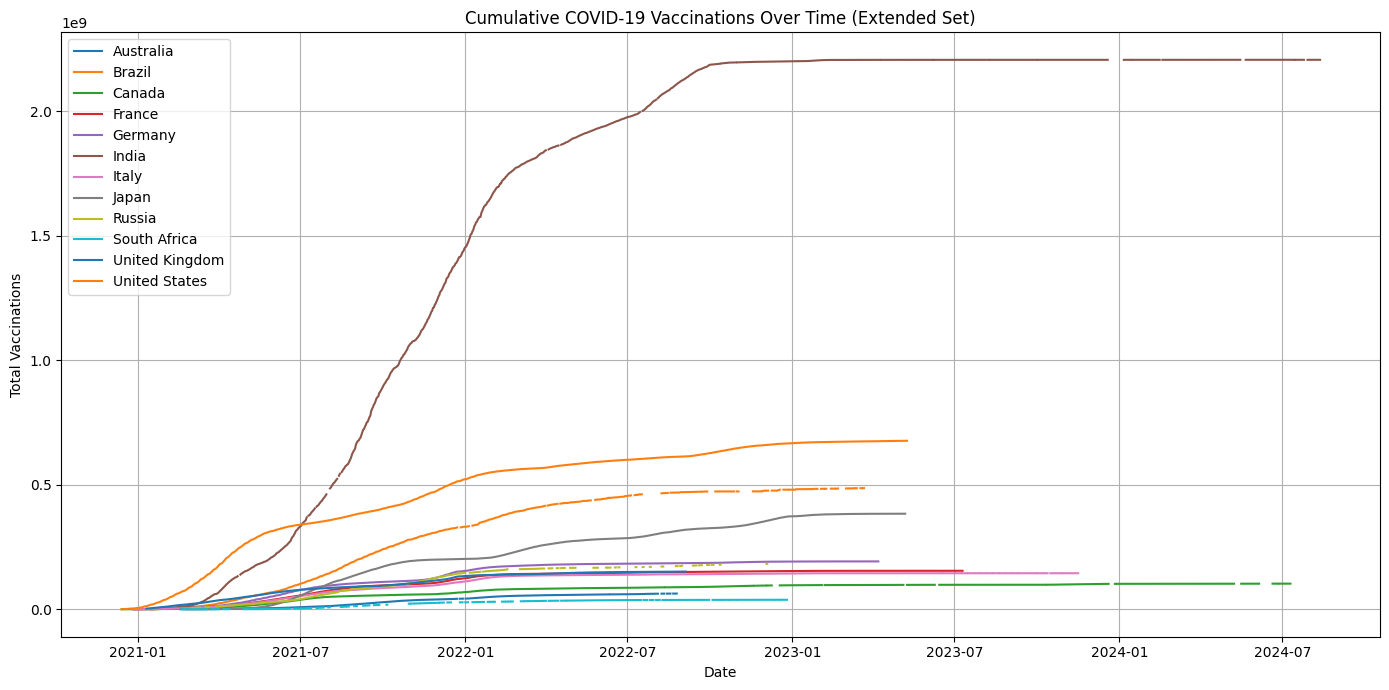

In [7]:
plt.figure(figsize=(14, 7))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Cumulative COVID-19 Vaccinations Over Time (Extended Set)")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\mn\AppData\Local\Temp\ipykernel_20068\3749416837.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='% vaccinated', y='location', data=latest.sort_values('% vaccinated', ascending=False), palette="viridis")


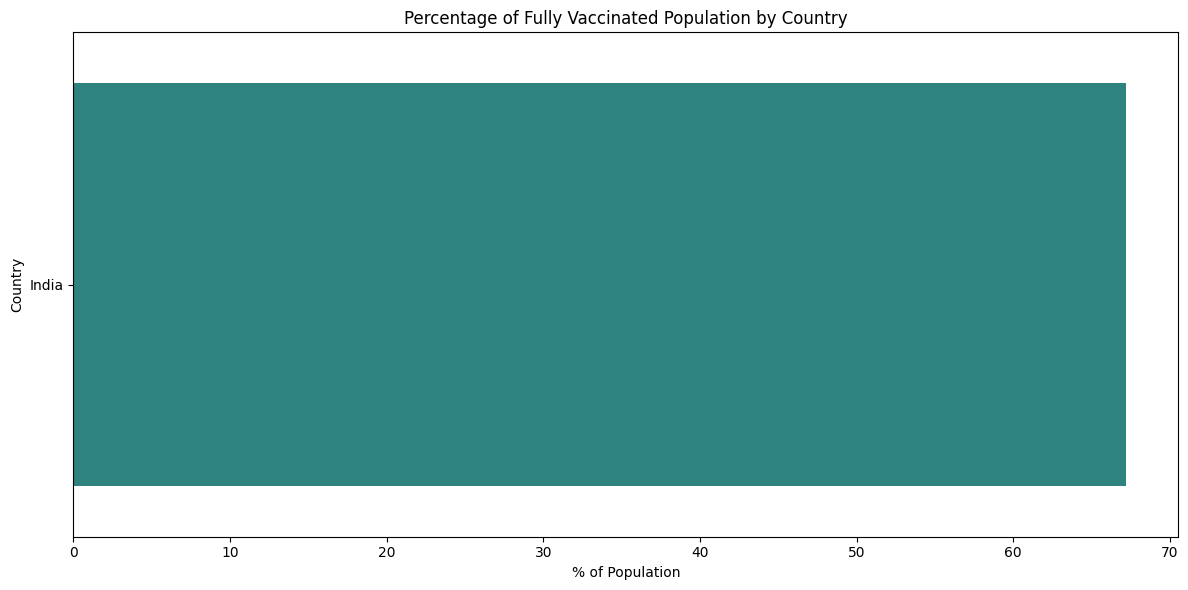

In [8]:
latest = df.sort_values('date').groupby('location').tail(1)
latest = latest.dropna(subset=['people_fully_vaccinated', 'population'])
latest['% vaccinated'] = (latest['people_fully_vaccinated'] / latest['population']) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='% vaccinated', y='location', data=latest.sort_values('% vaccinated', ascending=False), palette="viridis")
plt.title("Percentage of Fully Vaccinated Population by Country")
plt.xlabel("% of Population")
plt.ylabel("Country")
plt.tight_layout()
plt.show()